# import libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv('/Users/kartheekseemala/Downloads/diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
col_names = ['Pregnant','Glucose','BP','Skin','Insulin','BMI','Pedigree','Age','Label']
pima= pd.read_csv('/Users/kartheekseemala/Downloads/diabetes.csv',header=None,names=col_names)
pima.drop(pima.index[:1],inplace=True)
pima.head()

,Pregnant,Glucose,BP,Skin,Insulin,BMI,Pedigree,Age,Label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


# Selecting Feature

Here, you need to divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).



In [25]:
feature_cols = ['Pregnant','Insulin','BMI','Age','Glucose','BP','Pedigree']
X = pima[feature_cols]
y = pima.Label #Target Variable
y.shape
X.shape

(768, 7)

# Splitting Data

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,random_state=0,test_size=0.25)

# Model Development and Prediction

First, import the Logistic Regression module and create a Logistic Regression classifier object using LogisticRegression() function.

Then, fit your model on the train set using fit() and perform prediction on the test set using predict().

In [29]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

# Model Evaluation using Confusion Matrix


In [30]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[119,  11],
       [ 26,  36]])

# Visualizing Confusion Matrix using Heatmap



In [31]:
%matplotlib inline

Text(0.5, 15.0, 'Predicted Label')

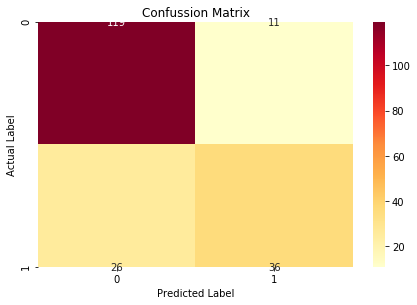

In [38]:
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlOrRd',fmt='g')
plt.tight_layout()
plt.title('Confussion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# Confusion Matrix Evaluation Metrics



In [43]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))
print('Precision:',metrics.precision_score(y_test,y_pred,pos_label='1'))
print('Recall:',metrics.recall_score(y_test,y_pred,pos_label='1'))

Accuracy: 0.8072916666666666
Precision: 0.7659574468085106
Recall: 0.5806451612903226


# ROC Curve



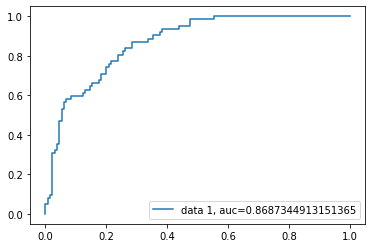

In [47]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba,pos_label='1')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)